# Introduction to Exploratory Data Analysis


In [1]:
# Never charge into a dataframe by doing confidence intervals and such. Graphs work well

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url ='https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv'
df_swing= pd.read_csv(url)
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


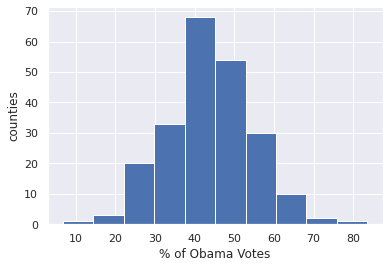

In [4]:
# set seaborn as style
sns.set()
#plot a histogram of dem_share and label
_ = plt.hist(df_swing.dem_share)
_= plt.xlabel('% of Obama Votes')
_= plt.ylabel('counties')
plt.show()

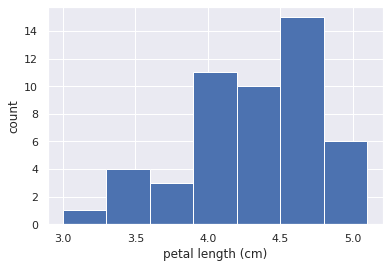

In [8]:
# Compute number of data points: n_data
n_data= len(versicolor_petal_length)
# Number of bins is the square root of number of data points: n_bins
n_bins= np.sqrt(n_data)
## Convert number of bins to integer: n_bins
n_bins= int(n_bins)
#plot
plt.hist(versicolor_petal_length, bins=n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

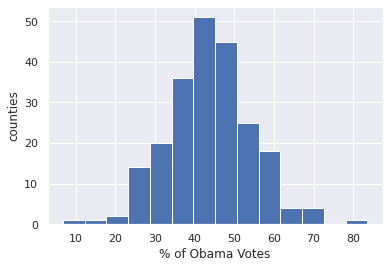

In [9]:
# create the perfect bins in the df
lenn= len(df_swing.dem_share)
sq= np.sqrt(lenn)
intt= int(sq)
plt.hist(df_swing.dem_share, bins=intt)
_= plt.xlabel('% of Obama Votes')
_= plt.ylabel('counties')


# Plot all of your data: Bee swarm plot

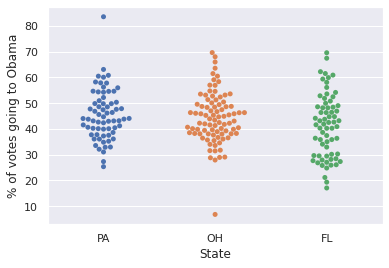

In [6]:
# Shows how each swing state and how much of the % votes going to Obama
sns.swarmplot(x='state', y='dem_share', data=df_swing)
_= plt.xlabel('State')
_=plt.ylabel('% of votes going to Obama')
plt.show()

# Plot all of your data: ECDFs


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n= len(data)
    # Sort the data
    x= np.sort(data)
    # arrange the data
    y= np.arange(1, n+1)/n
    #return x, y
    return x, y

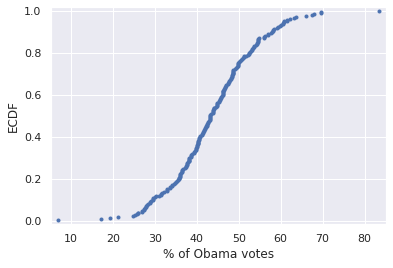

In [29]:
# Compute ECDF 
x_share, y_share= ecdf(df_swing.dem_share)
# Plot 
plt.plot(x_share, y_share, '.', linestyle='none')
plt.xlabel('% of Obama votes')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()


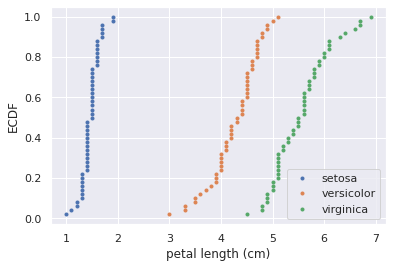

In [45]:
# Compute ECDFs
x_set, y_set= ecdf(setosa_petal_length)
x_vers, y_vers= ecdf(versicolor_petal_length)
x_virg, y_virg= ecdf(virginica_petal_length)



# Plot all ECDFs on the same plot
_= plt.plot(x_set, y_set, marker= '.', linestyle='none')
_=plt.plot(x_vers, y_vers, marker= '.', linestyle='none')
_=plt.plot(x_virg, y_virg, marker= '.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Introduction to summary statistics: The sample mean and median


In [51]:
# Compute the mean: mean_length_vers
mean_length_vers = versicolor_petal_length.mean()
mean_length_vers= np.mean(versicolor_petal_length)
med= sorted(versicolor_petal_length)
med= np.median(med)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')
print('Median is :', med)

I. versicolor: 4.26 cm
Median is : 4.35


# Percentiles, outliers, and box plots


In [52]:
np.percentile(df_swing.dem_share, [25,50,75])

array([37.3025, 43.185 , 49.925 ])

In [53]:
# Specify array of percentiles: percentiles
percentiles= np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers= np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


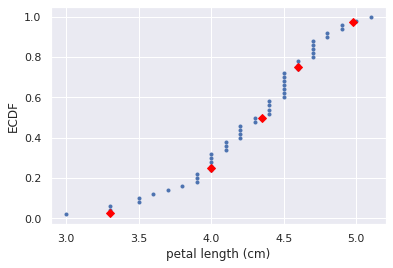

In [57]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_= plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

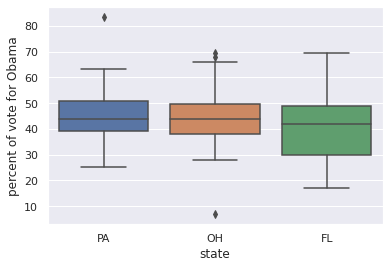

In [60]:
#plot the state of dem share
sns.boxplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.show()

# Variance and standard deviation


In [61]:
# Array of differences to mean: differences
differences= (versicolor_petal_length - versicolor_petal_length.mean())
# Square the differences: diff_sq
diff_sq= differences ** 2
# Compute the mean square difference: variance_explicit
variance_explicit= np.mean(diff_sq)
# Compute the variance using NumPy: variance_np
variance_np= np.var(versicolor_petal_length)
#print
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [62]:
# Compute the variance: variance
variance= np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(versicolor_petal_length.std())

0.4651881339845203
0.4651881339845203


# Probabilistic logic and statistical inference


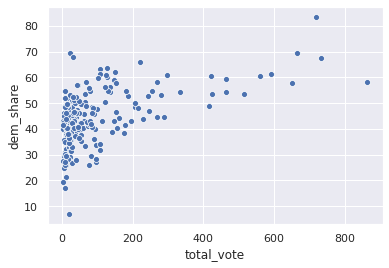

In [71]:
df_swing['total_vote']= df_swing.total_votes/1000
sns.scatterplot(x='total_vote', y='dem_share', data=df_swing)

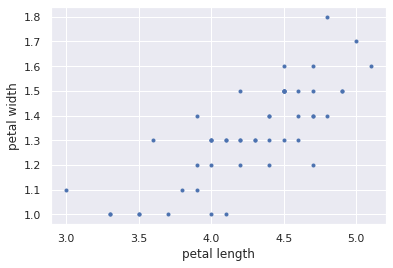

In [74]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.xlabel('petal length')
plt.ylabel('petal width')


# Show the result
plt.show()

In [77]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix= np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov= covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [13]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Probabilistic logic and statistical inference


In [79]:
# To draw probabilistic conclusions about what we might expect if we collected the same data again.
# To draw actionable conclusions from data.
# To draw more general conclusions from relatively few data or observations.

# Random number generators and hacker statistics


(array([114., 112.,  95., 102.,  81., 111.,  98.,  88., 100.,  99.]),
 array([0.00463202, 0.10414059, 0.20364915, 0.30315772, 0.40266628,
        0.50217485, 0.60168341, 0.70119198, 0.80070054, 0.90020911,
        0.99971767]),
 <a list of 10 Patch objects>)

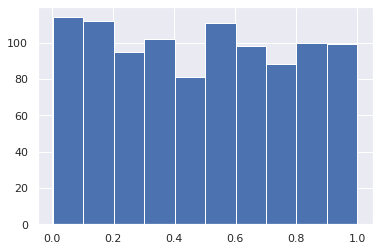

In [81]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers= np.empty(1000)

#write a for loop
for i in range(1000):
    random_numbers[i]= np.random.random()
#plot 
plt.hist(random_numbers)


In [5]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number= np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number <p :
            n_success += 1

    return n_success

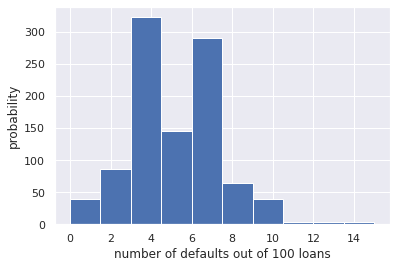

In [87]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults= np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

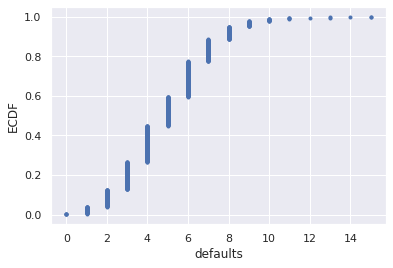

Probability of losing money = 0.022


In [89]:
# Compute ECDF: x, y
x, y= ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('defaults')
plt.ylabel('ECDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money= np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


# Probability distributions and stories: The Binomial distribution


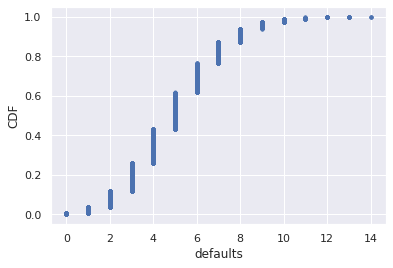

In [90]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults= np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('defaults')
plt.ylabel('CDF')



# Show the plot
plt.show()

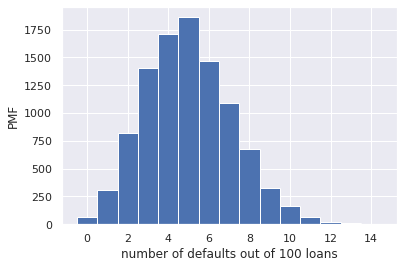

In [92]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

# Poisson processes and the Poisson distribution


In [93]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


In [100]:
#average amount of no hitters in a season
251/115
#Whats the chances 7 no hitters in one season
#Draw 10,000 samples out of Poisson distribution:
n_nohitters= np.random.poisson(251/115, size=10000)

#Find the total amount of samples that 7 or bigger
n_large= np.sum(n_nohitters >=7)

# Compute probability of getting seven or more: p_large
p_large= n_large /10000

#Print out results
print('The chances of 7 or more no hitters in a single season are:', p_large)

The chances of 7 or more no hitters in a single season are: 0.0072


# Probability density functions

#The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

# Introduction to the Normal distribution


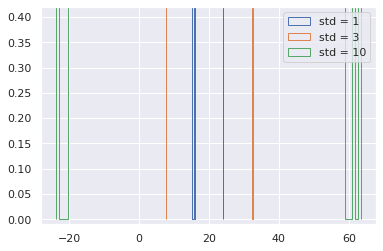

In [107]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1= np.random.normal(20, 1, size=100000)
samples_std3= np.random.normal(20, 3, size=100000)
samples_std10= np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100,  histtype='step')
plt.hist(samples_std3, bins=100,  histtype='step')
plt.hist(samples_std10, bins=100, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()



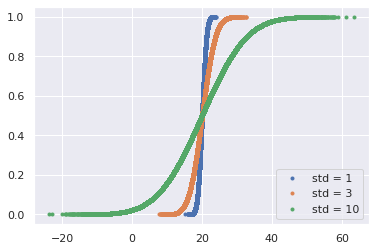

In [111]:
# also work x_std1, y_std1= ecdf(np.random.normal(20,2, size=10000))
# Generate CDFs
x_std1, y_std1= ecdf(samples_std1)
x_std3, y_std3= ecdf(samples_std3)
x_std10, y_std10= ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


# The Normal distribution: Properties and warnings


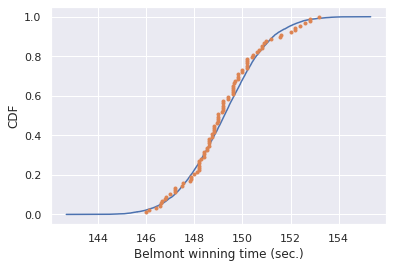

In [113]:
# Compute mean and standard deviation: mu, sigma
mu= np.mean(belmont_no_outliers)
sigma= np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples= np.random.normal(mu, sigma, size=10000)

#Get the cdf and ecdf
x_theor, y_theor= ecdf(samples)
x, y= ecdf(belmont_no_outliers)

#plot
plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [115]:
# What are the chances of a horse matching or beating Secretariat's record?

# Take a million samples out of the Normal distribution: samples
samples= np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob= np.sum(samples <=144)/ len(samples) 

#print
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.00063


# The Exponential distribution


In [6]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1= np.random.exponential(tau1, size=size)
    # Draw samples out of the second exponential distriubution: t2
    t2= np.random.exponential(tau2, size=size)
    return t1 + t2

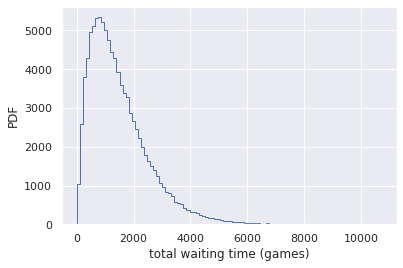

In [121]:
#The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715

# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step')

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Statistical Thinking in Python (Part 2)
______________________________________________

# Optimal parameters


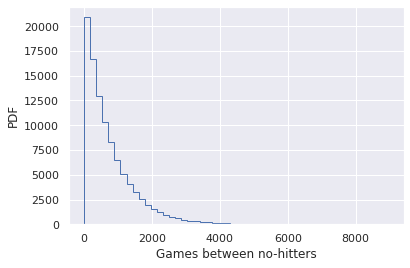

In [124]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

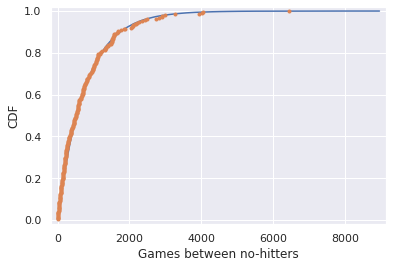

In [126]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

# plot suggests no hitter is independent of time

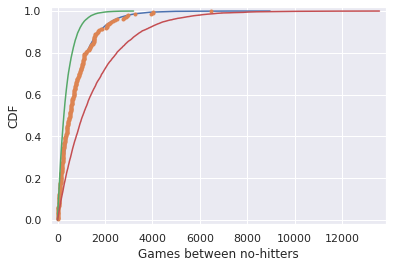

In [127]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half =  ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

# Linear regression by least squares


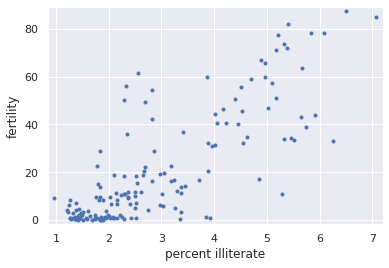

0.8041324026815341


In [131]:
# Plot the illiteracy rate versus fertility
_= plt.plot(fertility, illiteracy, marker='.', linestyle='none')
# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
#show plot 
plt.show()
# perform pearson coeffiecent
print(pearson_r(illiteracy, fertility))

the slope is: 0.04979854809063418
intercept= 1.888050610636557


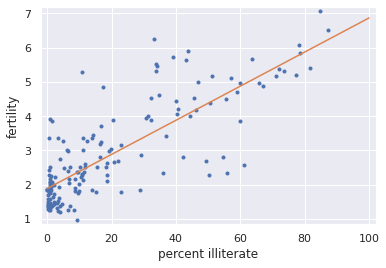

In [144]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

#  Perform a linear regression using np.polyfit(): a, b
# this can tell us the slope and y-int
a, b = np.polyfit(illiteracy, fertility, 1)

## Print the results to the screen
print('the slope is:' , a)
print('intercept=', b)

# Make theoretical line to plot
#np.array makes the line go out further
#mx+b 
x= np.array([0, 100])
y= a *x +b

#add to the graph 
_= plt.plot(x,y)

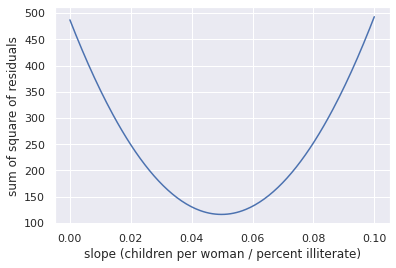

In [145]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

# The importance of EDA: Anscombe's quartet


0.5000909090909095 3.000090909090909


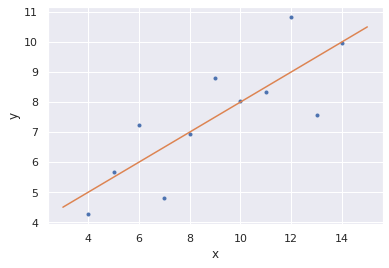

In [152]:
# Perform linear regression: a, b
a, b= np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor= np.array([3,15])
y_theor= a *x_theor +b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [161]:
# Iterate through x,y pairs
for x, y in zip(ans_x, ans_y):
    # Compute the slope and intercept: a, b
    a, b= np.polyfit(ans_x, ans_y, 1)
#print slope and y-int
print(a, b)

0.5000909090909095 3.000090909090909


# Generating bootstrap replicates


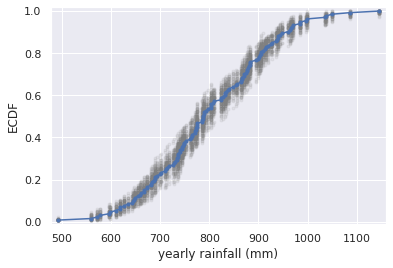

In [175]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Bootstrap confidence intervals


In [7]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

10.507337913808431


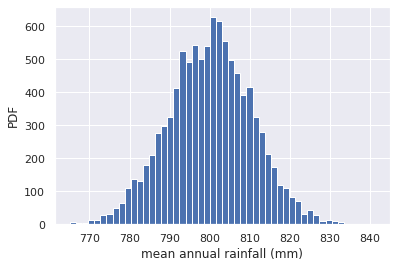

In [180]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates= draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem= np.std(rainfall)/ np.sqrt(len(rainfall))

# Compute and print standard deviation of bootstrap replicates
bs_std= np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


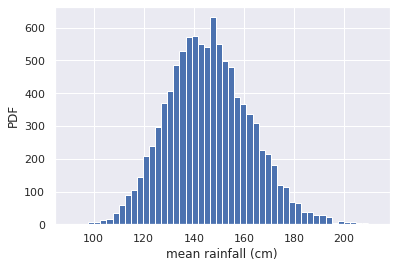

In [182]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates= draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates= bs_replicates/100

# Make a histogram of the results
plt.hist(bs_replicates, bins=50)
plt.xlabel('mean rainfall (cm)')
plt.ylabel('PDF')
plt.show()

95% confidence interval = [664.57290837 868.38256972] games


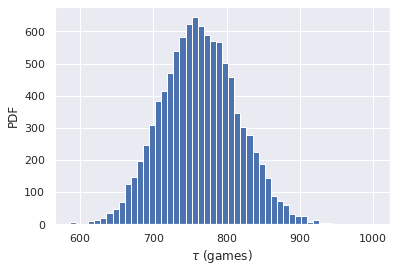

In [183]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates= draw_bs_reps(nohitter_times, np.mean, size=10000)

## Compute the 95% confidence interval: conf_int
conf_int= np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

#plot the histogram
plt.hist(bs_replicates, bins=50)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Pairs bootstrap 

In [8]:
####
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[0.04411691 0.05516438]


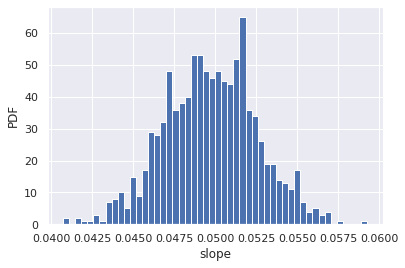

In [186]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps= draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

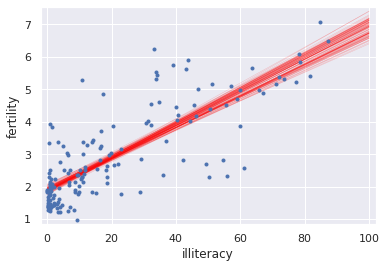

In [187]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Formulating and simulating a hypothesis


In [22]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm= np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]


In [9]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


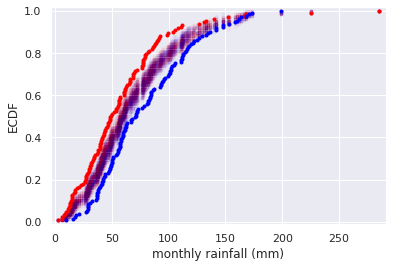

In [27]:
for _ in range(0,50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Test statistics and p-values


In [49]:
# pvalue is 
#the probability of observing a test statistic equally or more extreme than the one you observed 
#given that the null hypothesis is true.

In [10]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Text(0, 0.5, 'Share of votes')

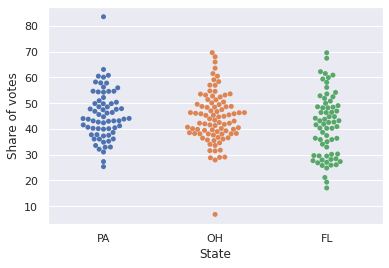

In [51]:
# Make bee swarm plot
sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('State')
plt.ylabel('Share of votes')

In [14]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0047


# Bootstrap hypothesis tests


In [63]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0044


In [70]:
empirical_diff_means= np.mean(force_a)- np.mean(force_b)

# Compute mean of all forces: mean_force
mean_force= np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted= force_a- np.mean(force_a) + mean_force
force_b_shifted= force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a= draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b= draw_bs_reps(force_b_shifted, np.mean, size=10000)

## Get replicates of difference of means: bs_replicates
bs_replicates= bs_replicates_a- bs_replicates_b

#p value
p= np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p:', p)

p: 0.0052


# A/B testing

In [12]:
# Construct arrays of data: dems, reps
dems= np.array([True] * 153  + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac= np.sum(dems)/ len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates= draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

#p value
p= np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)
    


p-value = 0.0


In [76]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


# Test of correlation


In [79]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)
#this means no correlation

p-val = 0.0


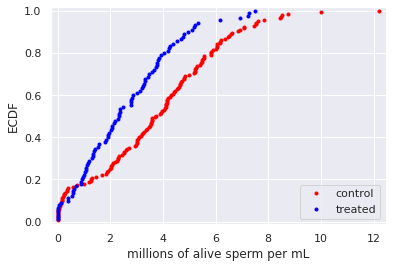

In [87]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated= ecdf(treated)

#plt plot
plt.plot(x_control, y_control, marker='.', linestyle='none', color='red')
plt.plot(x_treated, y_treated, marker='.', linestyle='none', color='blue')

#margins
plt.margins(0.02)

#legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


In [90]:
# Compute the difference in mean sperm count: diff_means
diff_means= diff_of_means(control, treated)

## Compute mean of pooled data: mean_count
mean_count= np.mean(np.concatenate((control, treated)))

## Generate shifted data sets
control_shifted= control- np.mean(control) + mean_count
treated_shifted= treated- np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control-  bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


# Finch beaks and the need for statistics


In [16]:
df.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


Text(0, 0.5, 'Beak length(mm)')

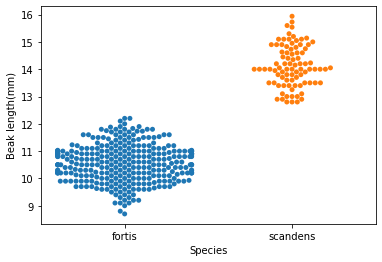

In [18]:
#swarm plot of speices vs length
sns.swarmplot(x='species', y='Beak length, mm', data=df)
plt.xlabel('Species')
plt.ylabel('Beak length(mm)')

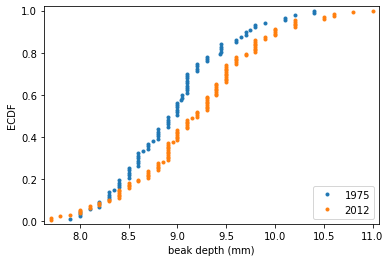

In [21]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [22]:
# Compute the difference of the sample means: mean_diff
mean_diff = diff_of_means(bd_2012, bd_1975)

## Get bootstrap replicates of means
bs_replicates_1975= draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012= draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates= bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int= np.percentile(bs_diff_replicates, [2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06052939 0.38998491] mm


In [26]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.003


# Variation in beak shape

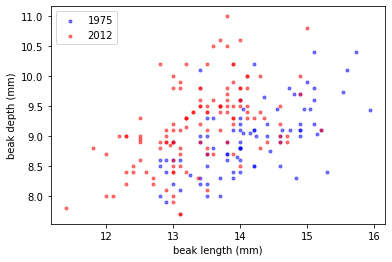

In [28]:
# Make scatter plot of 1975 data
_ = plt.scatter(bl_1975, bd_1975, marker='.',
             linestyle='None', alpha=0.5, color='blue')

# Make scatter plot of 2012 data
_ = plt.scatter(bl_2012, bd_2012, marker='.',
            linestyle='None', alpha=0.5, color='red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [29]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33911477 0.59280446]
1975: intercept = 2.3908752365842263 conf int = [0.58120237 4.14852539]
2012: slope = 0.462630358835313 conf int = [0.33677932 0.60052083]
2012: intercept = 2.977247498236019 conf int = [1.16846887 4.66552259]


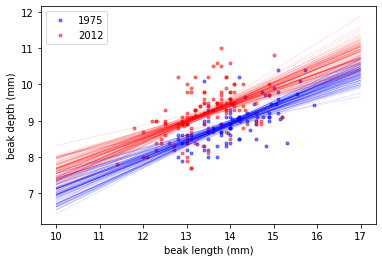

In [30]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [31]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55705801 1.60069539]
2012: mean ratio = 1.4658342276847767 conf int = [1.44443269 1.48811767]


# Calculation of heritability


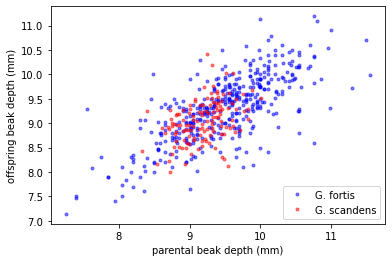

In [38]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


In [39]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [41]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.4117063629401258 [0.26343752 0.54281096]
G. fortis: 0.7283412395518484 [0.66549378 0.77729896]


In [43]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)
# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.36130031 0.75690061]
G. fortis: 0.7229051911438156 [0.64814678 0.79225711]


In [44]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0
